# System Project Design

**Background**: For my system design project, I wanted to pair GPT-3 with a churn prediction algorithm for a telecom company. The company wants to proactively identify customers who are likely to churn and stop purchasing. Once a customer is identified to churn, GPT-3 can send them an informational email on the company's product offerings to entice the customer and get them to retain. 

**Modeling**: There are several applications of models for this project.  
Step 1: Creating a binary classification model to help predict customer churn.
Step 2: Using the model's prediction, proactively generate an email. The email will entice the customer to stay and ideally purchase again. I will use GPT-3 to help reduce workload on campaign staff by proactively writing a repository of emails based on the company's product IT offerings. The campaign staff can then pick from a collection of premade blurbs to incorporate into their emails.

**Decomposition**:
Reduce workload: In marketing campaigns there is traditionally an entire team of people for each type of campaign that are behind the scenes drafting up different emails customers receive. Using GPT-3 I hope to reduce the overall workload and process of writing multiple different email drafts (that all sound essentially the same). This will free up the campaign team to do other more creative work.  

Speed up the process: while it takes a long time and a lot of energy to draft up different emails, it takes even longer to actually get the email approved by legal. This is arguably the slowest part of the entire process. I hope by using GPT-3 I can generate several emails for various ocassions. i.e. xmas holiday marketing email, halloween, labor day sale, etc. that way multiple emails can be sent to legal at once, early, and the overall process of creating emails to getting legal approval is sped up.  

Achieve new insight: In addition to using GPT-3 the other big question I hope to answer is looking at and predicting customer churn. By proactively identifying customers we believe will churn in the future, we can use GPT-3 to send them a personalized email based on previous product interactions with our brand.  

**Domain Expertise**:
In general we need to be mindful of marketing 'donts' that come up. For example we can not create offers or emails that discriminate based on age, race, religion, etc. It is criticially important to check the text GPT-3 is producing to make sure these biases are minimized. It is also important to have someone knowledgeable in IT read the email blurbs and make sure it is logical.  

**Data**: The data is telecommunications data provided from kaggle : https://www.kaggle.com/datasets/blastchar/telco-customer-churn    
Each row represents a customer, each column contains customer’s attributes described below:  
Customers who left within the last month – Churn  
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies  
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges  
Demographic info about customers – gender, age range, and if they have partners and dependents  

**Design**: the AI solution used was a neural network with binary cross entropy loss function. Hyperparameter tuning was completed and integrated into a pipeline. The entire process is stored in a docker image. I have also used this to create an azure AI infrastructure with connectivity to powerbi dashboard.  
**Diagnosis**: For checking for bias, I am predominantly concerned about GPT-3's outputs as these are based on human provided examples and suggestions. I hoped to minimize this by having GPT only 'tell me facts' about various IT offerings. By asking for fun informative product offering descriptions which can then be included in emails and marketing communications, I hope to avoid subjective human bias.  
**Deployment**: For a customer churn model, concept drift definitely needs to be monitored as new influences (products, services, experiences, external factors etc) all play a role.For GPT-3 text generation I see less of a need for continuous monitoring as it was designed to generate a bunch of email blurbs to be used and vetted by legal in one sitting - say once a quarter - so more prevalent monitoring shouldnt be required unlike the actual churn model. Continuous monitoring will need to be done for long term use of the churn model which will likely require retaining of the model when new data becomes present, or a lot of time has passed since the initial training.  




**System Development Pipeline**:  
Using github and docker.  
Hosting Environment - MS Azure  
Storage - MS Azure's sql database

I have provided a Dockerfile for model deployment. From my local system, a dockerfile was created, then uploaded to docker where it can be used. I also integrated this into my Azure environment. I cannot include all images here, please consult the README.md file thank you

In [2]:
#from .py helper script
import helper as h 

In [3]:
# create instance of helper class named Sys
ch = h.Sys() 

In [4]:
# reads in our data 
df = ch.get_data()

In [5]:
# performs several basic checks
ch.data_checks()

########## Performing Basic Data Checks ##########
Data dimensions: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract  

### Demographics 

#### Dependents

<AxesSubplot:>

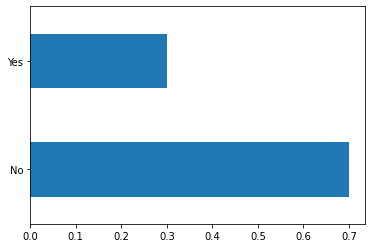

In [6]:
df.Dependents.value_counts(normalize=True).plot(kind='barh')

Most customers do not have dependents. Only ~30% do have dependents

#### Partners

<AxesSubplot:>

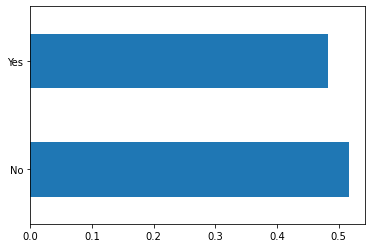

In [7]:
df.Partner.value_counts(normalize=True).plot(kind='barh')

Roughly 50% of customers have partners

#### Partners & Dependents

In [8]:
df.groupby(['Partner','Dependents']).count()/len(df)

customerID    gender  SeniorCitizen    tenure  \
Partner Dependents                                                  
No      No            0.465711  0.465711       0.465711  0.465711   
        Yes           0.051257  0.051257       0.051257  0.051257   
Yes     No            0.234701  0.234701       0.234701  0.234701   
        Yes           0.248332  0.248332       0.248332  0.248332   

                    PhoneService  MultipleLines  InternetService  \
Partner Dependents                                                 
No      No              0.465711       0.465711         0.465711   
        Yes             0.051257       0.051257         0.051257   
Yes     No              0.234701       0.234701         0.234701   
        Yes             0.248332       0.248332         0.248332   

                    OnlineSecurity  OnlineBackup  DeviceProtection  \
Partner Dependents                                                   
No      No                0.465711      0.465711          0.465711   
        Yes               0.051257      0.051257          0.051257   
Yes     No                0.234701      0.234701          0.234701   
        Yes               0.248332      0.248332          0.248332   

                    TechSupport  StreamingTV  StreamingMovies  Contract  \
Partner Dependents                                                        
No      No             0.465711     0.465711         0.465711  0.465711   
        Yes            0.051257     0.051257         0.051257  0.051257   
Yes     No             0.234701     0.234701         0.234701  0.234701   
        Yes            0.248332     0.248332         0.248332  0.248332   

                    PaperlessBilling  PaymentMethod  MonthlyCharges  \
Partner Dependents                                                    
No      No                  0.465711       0.465711        0.465711   
        Yes                 0.051257       0.051257        0.051257   
Yes     No                  0.234701       0.234701        0.234701   
        Yes                 0.248332       0.248332        0.248332   

                    TotalCharges     Churn  
Partner Dependents                          
No      No              0.465711  0.465711  
        Yes             0.051257  0.051257  
Yes     No              0.234701  0.234701  
        Yes             0.248332  0.248332

Most customers 47% are single and no dependents. Only 25% have dependents and a partner

#### Senior CItizens

<AxesSubplot:>

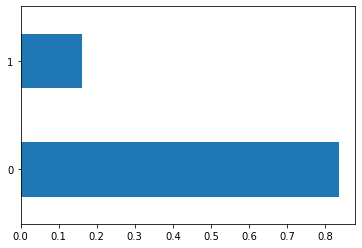

In [9]:
df.SeniorCitizen.value_counts(normalize=True).plot(kind='barh')

Roughly 16% of customers are senior citizens. Our customer base is middle-to-younger aged

#### Gender

<AxesSubplot:>

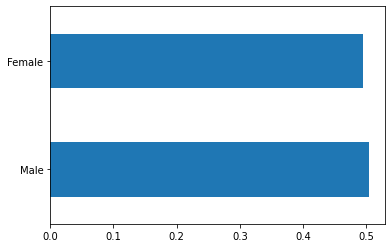

In [10]:
df.gender.value_counts(normalize=True).plot(kind='barh')

50/50 split for female male

### Account Info
#### Tenure and contract

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# Customers by tenure')

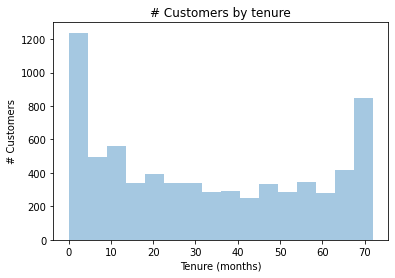

In [11]:
import seaborn as sns
ax = sns.distplot(df['tenure'], hist=True, kde=False)
ax.set_ylabel('# Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# Customers by tenure')

We see peaks of customers in early tenure months and late tenure, with a more even distribution in between

<AxesSubplot:>

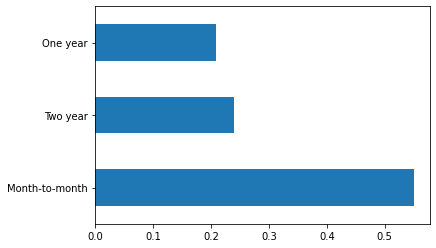

In [12]:
df.Contract.value_counts(normalize=True).plot(kind='barh')

In [13]:
df.groupby(['Contract','tenure'],dropna=False).count()

customerID  gender  SeniorCitizen  Partner  Dependents  \
Contract       tenure                                                           
Month-to-month 1              604     604            604      604         604   
               2              230     230            230      230         230   
               3              191     191            191      191         191   
               4              165     165            165      165         165   
               5              128     128            128      128         128   
               6               95      95             95       95          95   
               7              113     113            113      113         113   
               8              101     101            101      101         101   
               9              105     105            105      105         105   
               10              96      96             96       96          96   
               11              80      80             80       80          80   
               12              86      86             86       86          86   
               13              83      83             83       83          83   
               14              56      56             56       56          56   
               15              79      79             79       79          79   
               16              66      66             66       66          66   
               17              57      57             57       57          57   
               18              77      77             77       77          77   
               19              52      52             52       52          52   
               20              54      54             54       54          54   
               21              44      44             44       44          44   
               22              64      64             64       64          64   
               23              47      47             47       47          47   
               24              58      58             58       58          58   
               25              49      49             49       49          49   
               26              49      49             49       49          49   
               27              41      41             41       41          41   
               28              34      34             34       34          34   
               29              48      48             48       48          48   
               30              43      43             43       43          43   
               31              40      40             40       40          40   
               32              46      46             46       46          46   
               33              31      31             31       31          31   
               34              40      40             40       40          40   
               35              43      43             43       43          43   
               36              22      22             22       22          22   
               37              35      35             35       35          35   
               38              27      27             27       27          27   
               39              21      21             21       21          21   
               40              34      34             34       34          34   
               41              29      29             29       29          29   
               42              31      31             31       31          31   
               43              29      29             29       29          29   
               44              20      20             20       20          20   
               45              22      22             22       22          22   
               46              26      26             26       26          26   
               47              27      27             27       27          27   
               48              15      15             

Most monthly contracts last for 1-2 months. 2 year contracts lasts for ~70 months. Customers with a longer contract are more loyal to the company. They stay for longer period of time.

#### Compare churn to important variables found in correlation plot

<AxesSubplot:>

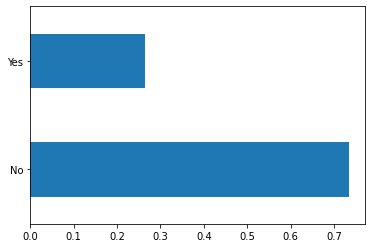

In [14]:
df.Churn.value_counts(normalize=True).plot(kind='barh')

Fortunately churn is lower, only 27% of total customer base has churned

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

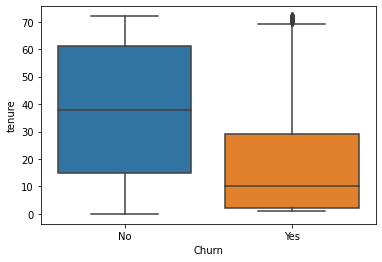

In [15]:
sns.boxplot(x = df.Churn, y = df.tenure)

customers who have longer tenures do not churn (obvious but good to confirm)

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

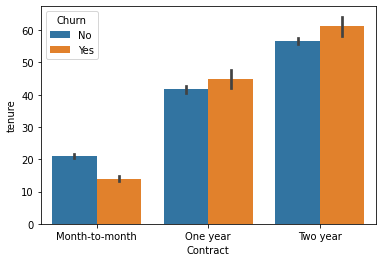

In [16]:
sns.barplot(x = df.Contract, y = df.tenure, hue=df.Churn)

Customers with month to month contracts churn the highest

In [17]:
df2 = ch.preprocessing()

In [18]:
xtrain,xtest,ytrain,ytest=ch.prep_train_test()

In [21]:
import logging
logging.disable(logging.WARNING)
ch.train_model()

Train on 5634 samples
Epoch 1/100
1088/5634 [====>.........................] - ETA: 0s - loss: 0.7280 - accuracy: 0.4642

2022-12-17 17:56:42.003709: W tensorflow/c/c_api.cc:291] Operation '{name:'training_4/Adam/dense_11/kernel/v/Assign' id:1275 op device:{requested: '', assigned: ''} def:{{{node training_4/Adam/dense_11/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_4/Adam/dense_11/kernel/v, training_4/Adam/dense_11/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


5634/5634 [==============================] - 0s 59us/sample - loss: 0.5952 - accuracy: 0.6775
Epoch 2/100
5634/5634 [==============================] - 0s 51us/sample - loss: 0.4600 - accuracy: 0.7618
Epoch 3/100
5634/5634 [==============================] - 0s 53us/sample - loss: 0.4349 - accuracy: 0.7916
Epoch 4/100
5634/5634 [==============================] - 0s 60us/sample - loss: 0.4286 - accuracy: 0.7943
Epoch 5/100
5634/5634 [==============================] - 0s 61us/sample - loss: 0.4259 - accuracy: 0.7971
Epoch 6/100
5634/5634 [==============================] - 0s 54us/sample - loss: 0.4228 - accuracy: 0.7987
Epoch 7/100
5634/5634 [==============================] - 0s 48us/sample - loss: 0.4223 - accuracy: 0.8012
Epoch 8/100
5634/5634 [==============================] - 0s 50us/sample - loss: 0.4220 - accuracy: 0.7998
Epoch 9/100
5634/5634 [==============================] - 0s 49us/sample - loss: 0.4207 - accuracy: 0.8024
Epoch 10/100
5634/5634 [==============================] - 

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-12-17 17:57:14.960865: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_11/Sigmoid' id:1008 op device:{requested: '', assigned: ''} def:{{{node dense_11/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_11/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [22]:
ch.confusion_matrix()

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1066
           1       0.60      0.45      0.52       343

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.78      0.79      0.78      1409

0.7934705464868701


In [23]:
## try it out, change out the prompt here. But be aware this has been tuned with IT product examples and facts
# uncomment below and try
ch.generate_email_notebook("tell me about the benefits of tech support")

'.”\n\n“We help people learn how to use computers and we fix their software or hardware when they have problems.”\n\nIt was kind of depressing. I had thought my job was the most important thing in the world'